PyMorphy2, PyMystem3 (от яндекса), spaCy

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys
if sys.version_info >= (3, 6):
    import zipfile
else:
    import zipfile36 as zipfile

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import download
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn  # Проверить необходимость

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier  # SVM модель
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#from gensim.models import Word2Vec
from collections import defaultdict, Counter
import openpyxl
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
#import umap
#import umap.plot

In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ivan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ivan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ivan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ivan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ivan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
chunk = pd.read_excel("2017_2022_Станки_экспорт_и_импорт_ОБРАБОТ.xlsx", header=0)

In [8]:
chunk.shape

(66165, 22)

In [9]:
chunk.head()

,Номер ТД,н/п,Код ТН ВЭД,И/Э,"Наименование (торговое, коммерческое или иное традиционное)",Производитель,"Тов. знак, патент и т.д.",Количество,Вес нетто ( кг) за 1 ед.,Вес нетто (кг),...,Дата уч. в стат.,Дата рег. ТД,Страна уч. в там. стат.,Торгующая страна,Страна отправления,Страна назначения,Страна происхождения,Процедура,Код решения,Дата решения
0,10317100/311216/0019059,1,8465109000,ИМ,"СТАНОК ДЕРЕВООБРАТЫВАЮЩИЙ,СПОСОБНЫЙ ВЫПОЛНЯТЬ ...",JINAN XYZ MACHINERY LLC,ОТСУТСТВУЕТ,1,3800.0,3800.0,...,2017-01-03,2016-12-31,КИТАЙ,КИТАЙ,КИТАЙ,РОССИЯ,КИТАЙ,4000000,10,2017-01-03
1,10116070/301216/0021778,1,8458190000,ИМ,ОБОРУДОВАНИЕ МЕТАЛООБРАБАТЫВАЮЩЕЕ - УНИВЕРСАЛЬ...,DALIAN MACHINE TOOL GROUP CORP.,DMTG,6,2320.0,13920.0,...,2017-01-11,2016-12-30,КИТАЙ,КИТАЙ,КИТАЙ,РОССИЯ,КИТАЙ,4000000,10,2017-01-11
2,10504110/240317/0004976,1,8462218007,ИМ,ПРЕСС ДЛЯ ИЗГОТОВЛЕНИЯ ОТВОДОВ НАРУЖНИМ ДИАМЕТ...,TIANJIN JCBPO INTERNATIONAL SUPPLY CHAIN LIMITED,ОТСУТСТВУЕТ,1,28287.0,28287.0,...,2017-03-24,2017-03-24,КИТАЙ,КИТАЙ,КИТАЙ,РОССИЯ,КИТАЙ,4000000,10,2017-03-24
3,10216170/310517/0047149,1,8460121009,ИМ,СТАНОК ПЛОСКОШЛИФОВАЛЬНЫЙ МАРКИ ALEX МОДЕЛЬ RH...,ALEX MACHINE TOOLS PVT. LTD.,ALEX,1,2200.0,2200.0,...,2017-06-01,2017-05-31,ИНДИЯ,ИНДИЯ,ИНДИЯ,РОССИЯ,ИНДИЯ,4000000,10,2017-06-01
4,10129060/310517/0014483,1,8463101000,ИМ,ОБОРУДОВАНИЕ ДЛЯ ОБРАБОТКИ ПРОВОЛОКИ: ЛИНИЯ ДЛ...,"JIANGSU JIACHENG TECHNOLOGY CO.,LTD",JIANGSU,1,8960.0,8960.0,...,2017-05-31,2017-05-31,КИТАЙ,КИТАЙ,КИТАЙ,РОССИЯ,КИТАЙ,4000000,10,2017-05-31


In [60]:
words = chunk["Наименование (торговое, коммерческое или иное традиционное)"]

In [61]:
words.iloc[0]

'СТАНОК ДЕРЕВООБРАТЫВАЮЩИЙ,СПОСОБНЫЙ ВЫПОЛНЯТЬ РАЗЛИЧНЫЕ ОПЕРАЦИИ ПО МЕХАНИЧЕСКОЙ ОБРАБОТКЕ БЕЗ СМЕНЫ ИНСТРУМЕНТА МЕЖДУ ЭТИМИ ОПЕРАЦИЯМИ, С АВТОМАТИЧЕСКИМ ПЕРЕМЕЩЕНИЕМ  ОБРАБАТЫВАЕМОГО ИЗДЕЛИЯ МЕЖДУ ОПЕРАЦИЯМИ, МНОГОФИНКЦИОНАЛЬНЫЙ 4-Х КООРДИНАТНЫЙ'

In [8]:
#индексируем все слова
cv = CountVectorizer()
X_train_sparse = cv.fit_transform(words)

In [9]:
cv.vocabulary_ #полученный словарь из названий

{'станок': 45690,
 'деревообратывающий': 27786,
 'способный': 45421,
 'выполнять': 26019,
 'различные': 42250,
 'операции': 36935,
 'по': 38909,
 'механической': 34017,
 'обработке': 36292,
 'без': 24167,
 'смены': 44893,
 'инструмента': 29912,
 'между': 33557,
 'этими': 51135,
 'операциями': 36946,
 'автоматическим': 23566,
 'перемещением': 38249,
 'обрабатываемого': 36224,
 'изделия': 29632,
 'многофинкциональный': 34254,
 'координатный': 31685,
 'оборудование': 36177,
 'металообрабатывающее': 33893,
 'универсальный': 47960,
 'токарно': 46855,
 'винторезный': 25230,
 'горизонтальный': 26984,
 'чпу': 49891,
 'предназначен': 40261,
 'для': 28073,
 'токарной': 46858,
 'обработки': 36293,
 'деталей': 27847,
 'тел': 46535,
 'вращения': 25712,
 'также': 46416,
 'нарезания': 35181,
 'резьбы': 43202,
 'область': 36065,
 'применения': 40713,
 'применяются': 40746,
 'на': 34735,
 'предприятиях': 40353,
 'металообр': 33890,
 'пресс': 40447,
 'изготовления': 29601,
 'отводов': 37451,
 'наружним'

In [11]:
len(cv.vocabulary_) #длина словаря

51252

In [91]:
voc = cv.vocabulary_

In [97]:
voc_list = list(voc.keys())

In [101]:
Morph.parse(voc_list[8])[0][2]

'обработка'

In [102]:
morth_row_cv = []
for q in range(len(cv.vocabulary_)):
    q_row = Morph.parse(voc_list[q])[0][2]
    morth_row_cv.append(q_row)
morth_row_cv

['станок',
 'деревообратывать',
 'способный',
 'выполнять',
 'различный',
 'операция',
 'по',
 'механический',
 'обработка',
 'без',
 'смена',
 'инструмент',
 'между',
 'этот',
 'операция',
 'автоматический',
 'перемещение',
 'обрабатывать',
 'изделие',
 'многофинкциональный',
 'координатный',
 'оборудование',
 'металообрабатывать',
 'универсальный',
 'токарный',
 'винторезный',
 'горизонтальный',
 'чпу',
 'предназначить',
 'для',
 'токарный',
 'обработка',
 'деталь',
 'тело',
 'вращение',
 'также',
 'нарезание',
 'резьба',
 'область',
 'применение',
 'применяться',
 'на',
 'предприятие',
 'металообразец',
 'пресс',
 'изготовление',
 'отвод',
 'наружний',
 'диаметр',
 '530',
 '820мма',
 'тип',
 'zhw',
 'электрогидравлический',
 'поставляться',
 'разобрать',
 'вид',
 'удобство',
 'транспортировка',
 'плоскошлифовальный',
 'марка',
 'alex',
 'модель',
 'rh',
 '500',
 'точность',
 'позиционирование',
 'любой',
 'ось',
 '002',
 'мм',
 'реставрация',
 'ограночный',
 'диск',
 'ввозиться',
 '

In [113]:
pd.DataFrame(morth_row_cv).to_excel('Morph.xlsx')

In [105]:
len(set(morth_row_cv))

39078

In [109]:
pd.DataFrame(set(morth_row_cv)).to_csv('Morph.csv')

# HashingVectorizer

In [13]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = cv.vocabulary_.keys()#["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = HashingVectorizer(n_features=50)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())


(51252, 50)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
a = list(np.arange(1, vector.shape[1], 1))

In [15]:
HashedData = pd.DataFrame(vector.toarray(), columns=np.arange(0, vector.shape[1], 1))

In [16]:
HashedData['weight']=chunk['Вес нетто ( кг) за 1 ед.']

In [17]:
HashedData

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,weight
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3800.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2320.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28287.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2200.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500.0
51248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0
51249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1800.0
51250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,68210.0


In [10]:
chunk["Код ТН ВЭД"] = chunk["Код ТН ВЭД"].astype(str)
chunk = chunk[chunk['Код ТН ВЭД'].map(lambda x: str.isnumeric(x[0]))]
chunk = chunk[chunk["Наименование (торговое, коммерческое или иное традиционное)"] != "<НЕ ОПРЕДЕЛЕНО>"]

In [11]:
orig_text = chunk[["Наименование (торговое, коммерческое или иное традиционное)", "Код ТН ВЭД"]]
orig_text.columns = ["data", "ТНВЭД"]

In [12]:
orig_text

,data,ТНВЭД
0,"СТАНОК ДЕРЕВООБРАТЫВАЮЩИЙ,СПОСОБНЫЙ ВЫПОЛНЯТЬ ...",8465109000
1,ОБОРУДОВАНИЕ МЕТАЛООБРАБАТЫВАЮЩЕЕ - УНИВЕРСАЛЬ...,8458190000
2,ПРЕСС ДЛЯ ИЗГОТОВЛЕНИЯ ОТВОДОВ НАРУЖНИМ ДИАМЕТ...,8462218007
3,СТАНОК ПЛОСКОШЛИФОВАЛЬНЫЙ МАРКИ ALEX МОДЕЛЬ RH...,8460121009
4,ОБОРУДОВАНИЕ ДЛЯ ОБРАБОТКИ ПРОВОЛОКИ: ЛИНИЯ ДЛ...,8463101000
...,...,...
66160,СТАНКИ ШЛИФОВАЛЬНЫЕ: СТАНОК ТРАНСПОРТАБЕЛЬНЫЙ ...,8460298009
66161,ОДНОСТОРОННИЙ КРОМКООБЛИЦОВОЧНЫЙ СТАНОК. В ЧАС...,8465990000
66162,"СТАНКИ, СПОСОБНЫЕ ВЫПОЛНЯТЬ РАЗЛИЧНЫЕ ОПЕРАЦИИ...",8465200000
66163,"СТАНКИ ДЛЯ ОБРАБОТКИ ДЕРЕВА,ПРОБКИ, ЭБОНИТА,КО...",8465990000


In [13]:
# orig_text = orig_text.head(10000)  # Немного уберём данные
#orig_text = orig_text.dropna()
orig_text["data"] = orig_text["data"].str.replace('\W', ' ')  # Удалим спецсимволы
orig_text["data"] = orig_text["data"].str.replace('\s+[a-zA-Z]\s+', ' ')  # Удалим одиночные литеры
orig_text["data"] = orig_text["data"].str.replace('\^[a-zA-Z]\s+', ' ')  # Удалим одиночные литеры в начале
orig_text["data"] = orig_text["data"].str.replace('\s+', ' ')  # Удалим множественные пробелы
orig_text["data"] = orig_text["data"].str.replace('\d+', '')  # Удалим цифры

C:\Users\ivan\AppData\Local\Temp\ipykernel_16140\3647067975.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  orig_text["data"] = orig_text["data"].str.replace('\W', ' ')  # Удалим спецсимволы
C:\Users\ivan\AppData\Local\Temp\ipykernel_16140\3647067975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orig_text["data"] = orig_text["data"].str.replace('\W', ' ')  # Удалим спецсимволы
C:\Users\ivan\AppData\Local\Temp\ipykernel_16140\3647067975.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  orig_text["data"] = orig_text["data"].str.replace('\s+[a-zA-Z]\s+', ' ')  # Удалим одиночные литеры
C:\Users\ivan\AppData\Local\Temp\ipykernel_16140\36470

In [14]:
orig_text

,data,ТНВЭД
0,СТАНОК ДЕРЕВООБРАТЫВАЮЩИЙ СПОСОБНЫЙ ВЫПОЛНЯТЬ ...,8465109000
1,ОБОРУДОВАНИЕ МЕТАЛООБРАБАТЫВАЮЩЕЕ УНИВЕРСАЛЬНЫ...,8458190000
2,ПРЕСС ДЛЯ ИЗГОТОВЛЕНИЯ ОТВОДОВ НАРУЖНИМ ДИАМЕТ...,8462218007
3,СТАНОК ПЛОСКОШЛИФОВАЛЬНЫЙ МАРКИ ALEX МОДЕЛЬ RH...,8460121009
4,ОБОРУДОВАНИЕ ДЛЯ ОБРАБОТКИ ПРОВОЛОКИ ЛИНИЯ ДЛЯ...,8463101000
...,...,...
66160,СТАНКИ ШЛИФОВАЛЬНЫЕ СТАНОК ТРАНСПОРТАБЕЛЬНЫЙ Ш...,8460298009
66161,ОДНОСТОРОННИЙ КРОМКООБЛИЦОВОЧНЫЙ СТАНОК В ЧАСТ...,8465990000
66162,СТАНКИ СПОСОБНЫЕ ВЫПОЛНЯТЬ РАЗЛИЧНЫЕ ОПЕРАЦИИ ...,8465200000
66163,СТАНКИ ДЛЯ ОБРАБОТКИ ДЕРЕВА ПРОБКИ ЭБОНИТА КОС...,8465990000


Токенизация

In [15]:
orig_text["data"] = [word_tokenize(entry.lower()) for entry in orig_text["data"]]
orig_text["data"]

C:\Users\ivan\AppData\Local\Temp\ipykernel_16140\3169181364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orig_text["data"] = [word_tokenize(entry.lower()) for entry in orig_text["data"]]


0        [станок, деревообратывающий, способный, выполн...
1        [оборудование, металообрабатывающее, универсал...
2        [пресс, для, изготовления, отводов, наружним, ...
3        [станок, плоскошлифовальный, марки, alex, моде...
4        [оборудование, для, обработки, проволоки, лини...
                               ...                        
66160    [станки, шлифовальные, станок, транспортабельн...
66161    [односторонний, кромкооблицовочный, станок, в,...
66162    [станки, способные, выполнять, различные, опер...
66163    [станки, для, обработки, дерева, пробки, эбони...
66164    [станки, строгальные, фрезерные, или, строгаль...
Name: data, Length: 66165, dtype: object

# Лемматизация

## WordNetLemmatizer

In [15]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,entry in enumerate(orig_text["data"]):
    # Declaring Empty List to store the words that follow the rules for this step
    final_words = []
    # Initializing WordNetLemmatizer()
    word_lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words("russian") and word.isalpha():
            word_final = word_lemmatized.lemmatize(word, tag_map[tag[0]])
            final_words.append(word_final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    orig_text.loc[index, "data_final"] = str(final_words)
orig_text["data_final"]

C:\Users\ivan\AppData\Local\Temp\ipykernel_16256\814247772.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orig_text.loc[index, "data_final"] = str(final_words)


0        ['станок', 'деревообратывающий', 'способный', ...
1        ['оборудование', 'металообрабатывающее', 'унив...
2        ['пресс', 'изготовления', 'отводов', 'наружним...
3        ['станок', 'плоскошлифовальный', 'марки', 'ale...
4        ['оборудование', 'обработки', 'проволоки', 'ли...
                               ...                        
66160    ['станки', 'шлифовальные', 'станок', 'транспор...
66161    ['односторонний', 'кромкооблицовочный', 'стано...
66162    ['станки', 'способные', 'выполнять', 'различны...
66163    ['станки', 'обработки', 'дерева', 'пробки', 'э...
66164    ['станки', 'строгальные', 'фрезерные', 'строга...
Name: data_final, Length: 66165, dtype: object

In [16]:
orig_text

,data,ТНВЭД,data_final
0,"[станок, деревообратывающий, способный, выполн...",8465109000,"['станок', 'деревообратывающий', 'способный', ..."
1,"[оборудование, металообрабатывающее, универсал...",8458190000,"['оборудование', 'металообрабатывающее', 'унив..."
2,"[пресс, для, изготовления, отводов, наружним, ...",8462218007,"['пресс', 'изготовления', 'отводов', 'наружним..."
3,"[станок, плоскошлифовальный, марки, alex, моде...",8460121009,"['станок', 'плоскошлифовальный', 'марки', 'ale..."
4,"[оборудование, для, обработки, проволоки, лини...",8463101000,"['оборудование', 'обработки', 'проволоки', 'ли..."
...,...,...,...
66160,"[станки, шлифовальные, станок, транспортабельн...",8460298009,"['станки', 'шлифовальные', 'станок', 'транспор..."
66161,"[односторонний, кромкооблицовочный, станок, в,...",8465990000,"['односторонний', 'кромкооблицовочный', 'стано..."
66162,"[станки, способные, выполнять, различные, опер...",8465200000,"['станки', 'способные', 'выполнять', 'различны..."
66163,"[станки, для, обработки, дерева, пробки, эбони...",8465990000,"['станки', 'обработки', 'дерева', 'пробки', 'э..."


In [17]:
orig_text = orig_text.dropna()
data, rating, data_final = orig_text["data"], orig_text["ТНВЭД"], orig_text["data_final"]

In [18]:
orig_text

,data,ТНВЭД,data_final
0,"[станок, деревообратывающий, способный, выполн...",8465109000,"['станок', 'деревообратывающий', 'способный', ..."
1,"[оборудование, металообрабатывающее, универсал...",8458190000,"['оборудование', 'металообрабатывающее', 'унив..."
2,"[пресс, для, изготовления, отводов, наружним, ...",8462218007,"['пресс', 'изготовления', 'отводов', 'наружним..."
3,"[станок, плоскошлифовальный, марки, alex, моде...",8460121009,"['станок', 'плоскошлифовальный', 'марки', 'ale..."
4,"[оборудование, для, обработки, проволоки, лини...",8463101000,"['оборудование', 'обработки', 'проволоки', 'ли..."
...,...,...,...
66160,"[станки, шлифовальные, станок, транспортабельн...",8460298009,"['станки', 'шлифовальные', 'станок', 'транспор..."
66161,"[односторонний, кромкооблицовочный, станок, в,...",8465990000,"['односторонний', 'кромкооблицовочный', 'стано..."
66162,"[станки, способные, выполнять, различные, опер...",8465200000,"['станки', 'способные', 'выполнять', 'различны..."
66163,"[станки, для, обработки, дерева, пробки, эбони...",8465990000,"['станки', 'обработки', 'дерева', 'пробки', 'э..."


## PyMorphy2

In [16]:
import pymorphy2

In [115]:
orig_text["data"].iloc[-1]

['станки', 'строгальные', 'фрезерные', 'или', 'строгально', 'калевочные']

In [55]:
orig_text["data"].iloc[3][7]

'точностью'

In [56]:
Morph.parse(orig_text["data"].iloc[3][7])

[Parse(word='точностью', tag=OpencorporaTag('NOUN,inan,femn sing,ablt'), normal_form='точность', score=1.0, methods_stack=((DictionaryAnalyzer(), 'точностью', 13, 4),))]

In [57]:
Morph.parse(orig_text["data"].iloc[3][7])[0][2]

'точность'

In [58]:
orig_text["data"].iloc[3][-4]

'собственных'

In [59]:
Morph.parse(orig_text["data"].iloc[3][-4])

[Parse(word='собственных', tag=OpencorporaTag('ADJF plur,gent'), normal_form='собственный', score=0.73913, methods_stack=((DictionaryAnalyzer(), 'собственных', 274, 21),)),
 Parse(word='собственных', tag=OpencorporaTag('ADJF plur,loct'), normal_form='собственный', score=0.173913, methods_stack=((DictionaryAnalyzer(), 'собственных', 274, 26),)),
 Parse(word='собственных', tag=OpencorporaTag('ADJF anim,plur,accs'), normal_form='собственный', score=0.086956, methods_stack=((DictionaryAnalyzer(), 'собственных', 274, 23),))]

In [66]:
Morph.parse(orig_text["data"].iloc[3][-4])[0][2]

'собственный'

In [67]:
morth_row = []
for u in range(len(orig_text["data"].iloc[3])):
    m_row = Morph.parse(orig_text["data"].iloc[3][u])[0][2]
    morth_row.append(m_row)
morth_row

['станок',
 'плоскошлифовальный',
 'марка',
 'alex',
 'модель',
 'rh',
 'с',
 'точность',
 'позиционирование',
 'по',
 'любой',
 'ось',
 'мм',
 'с',
 'чпу',
 'предназначить',
 'для',
 'реставрация',
 'ограночный',
 'диск',
 'ввозиться',
 'для',
 'собственный',
 'нужда',
 'ограночный',
 'производство']

In [86]:
%%time
Morph = pymorphy2.MorphAnalyzer()
final_morth_10 = []
for a in range(len(orig_text["data"].iloc[0:10])):    
    morth_row = []
    for w in range(len(orig_text["data"].iloc[a])):
        m_row_w = Morph.parse(orig_text["data"].iloc[a][w])[0][2]
        morth_row.append(m_row_w)
    final_morth_10.append(morth_row)

CPU times: total: 234 ms
Wall time: 326 ms


In [87]:
final_morth_10

[['станок',
  'деревообратывать',
  'способный',
  'выполнять',
  'различный',
  'операция',
  'по',
  'механический',
  'обработка',
  'без',
  'смена',
  'инструмент',
  'между',
  'этот',
  'операция',
  'с',
  'автоматический',
  'перемещение',
  'обрабатывать',
  'изделие',
  'между',
  'операция',
  'многофинкциональный',
  'х',
  'координатный'],
 ['оборудование',
  'металообрабатывать',
  'универсальный',
  'токарный',
  'винторезный',
  'станок',
  'горизонтальный',
  'без',
  'чпу',
  'предназначить',
  'для',
  'токарный',
  'обработка',
  'деталь',
  'тело',
  'вращение',
  'а',
  'также',
  'для',
  'нарезание',
  'резьба',
  'область',
  'применение',
  'применяться',
  'на',
  'предприятие',
  'металообразец'],
 ['пресс',
  'для',
  'изготовление',
  'отвод',
  'наружний',
  'диаметр',
  'мм',
  'тип',
  'zhw',
  'электрогидравлический',
  'с',
  'чпу',
  'поставляться',
  'в',
  'разобрать',
  'вид',
  'для',
  'удобство',
  'транспортировка'],
 ['станок',
  'плоскошлиф

Проводим лемматизацию для всех позиций из токенизированного массива:

In [15]:
%%time
Morph = pymorphy2.MorphAnalyzer()
Final_morth = []
for a in range(len(orig_text["data"])):    
    morth_row = []
    for w in range(len(orig_text["data"].iloc[a])):
        m_row_w = Morph.parse(orig_text["data"].iloc[a][w])[0][2]
        morth_row.append(m_row_w)
    Final_morth.append(morth_row)

CPU times: total: 5min 30s
Wall time: 5min 31s


In [16]:
Final_morth 

[['станок',
  'деревообратывать',
  'способный',
  'выполнять',
  'различный',
  'операция',
  'по',
  'механический',
  'обработка',
  'без',
  'смена',
  'инструмент',
  'между',
  'этот',
  'операция',
  'с',
  'автоматический',
  'перемещение',
  'обрабатывать',
  'изделие',
  'между',
  'операция',
  'многофинкциональный',
  'х',
  'координатный'],
 ['оборудование',
  'металообрабатывать',
  'универсальный',
  'токарный',
  'винторезный',
  'станок',
  'горизонтальный',
  'без',
  'чпу',
  'предназначить',
  'для',
  'токарный',
  'обработка',
  'деталь',
  'тело',
  'вращение',
  'а',
  'также',
  'для',
  'нарезание',
  'резьба',
  'область',
  'применение',
  'применяться',
  'на',
  'предприятие',
  'металообразец'],
 ['пресс',
  'для',
  'изготовление',
  'отвод',
  'наружний',
  'диаметр',
  'мм',
  'тип',
  'zhw',
  'электрогидравлический',
  'с',
  'чпу',
  'поставляться',
  'в',
  'разобрать',
  'вид',
  'для',
  'удобство',
  'транспортировка'],
 ['станок',
  'плоскошлиф

In [28]:
Morph_pd = pd.DataFrame(Final_morth)

In [29]:
Morph_pd.to_csv('Final_morph.csv')

Создаем лемматизированный массив список слов без стоп-слов:

In [46]:
stops = stopwords.words('russian')

In [40]:
tokens_without_sw = [word for word in Final_morth[-1] if not word in stops] 

In [41]:
tokens_without_sw

['станок', 'строгальный', 'фрезерный', 'строгальный', 'калёвочный']

In [42]:
set(tokens_without_sw)

{'калёвочный', 'станок', 'строгальный', 'фрезерный'}

In [43]:
list(set(tokens_without_sw))

['строгальный', 'фрезерный', 'станок', 'калёвочный']

In [114]:
Final_morth[-1]

['станок', 'строгальный', 'фрезерный', 'или', 'строгальный', 'калёвочный']

In [117]:
set(Final_morth[-1])

{'или', 'калёвочный', 'станок', 'строгальный', 'фрезерный'}

In [44]:
Final_morth_without_sw = []
for g in range(len(Final_morth)):
    nsw = [word for word in Final_morth[g] if not word in stops] 
    set_nsw = list(set(nsw))
    Final_morth_without_sw.append(set_nsw)


In [52]:
Final_morth_without_sw[-1]

['строгальный', 'фрезерный', 'станок', 'калёвочный']

Сохраним полученный массив в Pandas DataFrame:

In [53]:
Final_morth_without_sw_punc = []
for q in range(len(Final_morth)):
    xs = Final_morth_without_sw[q]
    s = ' '.join(xs)
    Final_morth_without_sw_punc.append(s)
    

In [54]:
pd.DataFrame(Final_morth_without_sw_punc)

,0
0,перемещение многофинкциональный станок обрабат...
1,станок также резьба тело предназначить деталь ...
2,поставляться удобство чпу наружний zhw пресс т...
3,станок точность производство плоскошлифовальны...
4,высокоскоростной медный предназначить диаметр ...
...,...
66160,клапан поверхность уплотнительный станок шлифо...
66161,станок частично назначение удобство кромкообли...
66162,станок обрабатывать смена центр способный выпо...
66163,станок мебельный производство эбонит кость дер...


In [55]:
pd.DataFrame(Final_morth_without_sw_punc).to_csv('Final_morth_without_sw_punc.csv')

In [32]:
df = pd.read_csv('Final_morth_without_sw_punc.csv')
df

,Unnamed: 0,0
0,0,перемещение многофинкциональный станок обрабат...
1,1,станок также резьба тело предназначить деталь ...
2,2,поставляться удобство чпу наружний zhw пресс т...
3,3,станок точность производство плоскошлифовальны...
4,4,высокоскоростной медный предназначить диаметр ...
...,...,...
66160,66160,клапан поверхность уплотнительный станок шлифо...
66161,66161,станок частично назначение удобство кромкообли...
66162,66162,станок обрабатывать смена центр способный выпо...
66163,66163,станок мебельный производство эбонит кость дер...


Создадим фрейм данных, с которым будем работать:

In [39]:
Final_predata = pd.DataFrame(list(df['0']), columns=['Описание'])

In [40]:
Final_predata["ТНВЭД"] = orig_text["ТНВЭД"]

In [41]:
Final_predata

,Описание,ТНВЭД
0,перемещение многофинкциональный станок обрабат...,8465109000
1,станок также резьба тело предназначить деталь ...,8458190000
2,поставляться удобство чпу наружний zhw пресс т...,8462218007
3,станок точность производство плоскошлифовальны...,8460121009
4,высокоскоростной медный предназначить диаметр ...,8463101000
...,...,...
66160,клапан поверхность уплотнительный станок шлифо...,8460298009
66161,станок частично назначение удобство кромкообли...,8465990000
66162,станок обрабатывать смена центр способный выпо...,8465200000
66163,станок мебельный производство эбонит кость дер...,8465990000


In [65]:
len(Final_predata["ТНВЭД"].unique())

223

<AxesSubplot:>

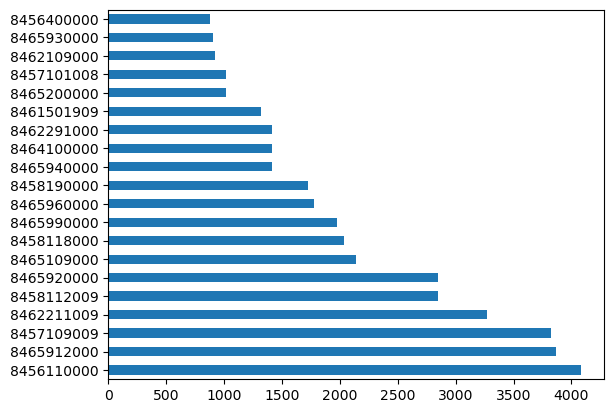

In [68]:
Final_predata["ТНВЭД"].value_counts().head(20).plot(kind='barh')

<AxesSubplot:>

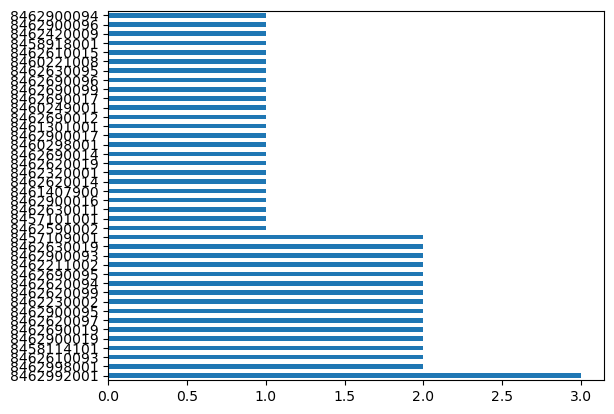

In [72]:
Final_predata["ТНВЭД"].value_counts().tail(40).plot(kind='barh')

Создаем биграм из описаний:

In [55]:
from nltk import word_tokenize 
from nltk.util import ngrams


In [63]:
data = Final_predata["Описание"].iloc[1]
tokens = word_tokenize(data.lower())
tokens

['станок',
 'также',
 'резьба',
 'тело',
 'предназначить',
 'деталь',
 'чпу',
 'металообразец',
 'винторезный',
 'область',
 'предприятие',
 'универсальный',
 'применение',
 'горизонтальный',
 'нарезание',
 'токарный',
 'оборудование',
 'вращение',
 'применяться',
 'обработка',
 'металообрабатывать']

In [68]:
unigram = list(nltk.ngrams(tokens, 1))
bigram = list(nltk.ngrams(tokens, 2))
print(unigram[:5])
print(bigram[:5])

[('станок',), ('также',), ('резьба',), ('тело',), ('предназначить',)]
[('станок', 'также'), ('также', 'резьба'), ('резьба', 'тело'), ('тело', 'предназначить'), ('предназначить', 'деталь')]


In [69]:
bigram

[('станок', 'также'),
 ('также', 'резьба'),
 ('резьба', 'тело'),
 ('тело', 'предназначить'),
 ('предназначить', 'деталь'),
 ('деталь', 'чпу'),
 ('чпу', 'металообразец'),
 ('металообразец', 'винторезный'),
 ('винторезный', 'область'),
 ('область', 'предприятие'),
 ('предприятие', 'универсальный'),
 ('универсальный', 'применение'),
 ('применение', 'горизонтальный'),
 ('горизонтальный', 'нарезание'),
 ('нарезание', 'токарный'),
 ('токарный', 'оборудование'),
 ('оборудование', 'вращение'),
 ('вращение', 'применяться'),
 ('применяться', 'обработка'),
 ('обработка', 'металообрабатывать')]

In [70]:
trigram = list(nltk.ngrams(tokens, 3))
trigram

[('станок', 'также', 'резьба'),
 ('также', 'резьба', 'тело'),
 ('резьба', 'тело', 'предназначить'),
 ('тело', 'предназначить', 'деталь'),
 ('предназначить', 'деталь', 'чпу'),
 ('деталь', 'чпу', 'металообразец'),
 ('чпу', 'металообразец', 'винторезный'),
 ('металообразец', 'винторезный', 'область'),
 ('винторезный', 'область', 'предприятие'),
 ('область', 'предприятие', 'универсальный'),
 ('предприятие', 'универсальный', 'применение'),
 ('универсальный', 'применение', 'горизонтальный'),
 ('применение', 'горизонтальный', 'нарезание'),
 ('горизонтальный', 'нарезание', 'токарный'),
 ('нарезание', 'токарный', 'оборудование'),
 ('токарный', 'оборудование', 'вращение'),
 ('оборудование', 'вращение', 'применяться'),
 ('вращение', 'применяться', 'обработка'),
 ('применяться', 'обработка', 'металообрабатывать')]

Теперь для всего датасета:

In [93]:
data_bi = []
for h in range(Final_predata["Описание"].shape[0]):
    data = Final_predata["Описание"].iloc[h]
    token_h = word_tokenize(data.lower())
    bigram_h = list(nltk.ngrams(token_h, 2))
    data_bi.append(bigram_h)

AttributeError: 'float' object has no attribute 'lower'

In [91]:
data_bi

[[('перемещение', 'многофинкциональный'),
  ('многофинкциональный', 'станок'),
  ('станок', 'обрабатывать'),
  ('обрабатывать', 'смена'),
  ('смена', 'деревообратывать'),
  ('деревообратывать', 'автоматический'),
  ('автоматический', 'способный'),
  ('способный', 'выполнять'),
  ('выполнять', 'обработка'),
  ('обработка', 'изделие'),
  ('изделие', 'координатный'),
  ('координатный', 'инструмент'),
  ('инструмент', 'различный'),
  ('различный', 'операция'),
  ('операция', 'х'),
  ('х', 'механический')],
 [('станок', 'также'),
  ('также', 'резьба'),
  ('резьба', 'тело'),
  ('тело', 'предназначить'),
  ('предназначить', 'деталь'),
  ('деталь', 'чпу'),
  ('чпу', 'металообразец'),
  ('металообразец', 'винторезный'),
  ('винторезный', 'область'),
  ('область', 'предприятие'),
  ('предприятие', 'универсальный'),
  ('универсальный', 'применение'),
  ('применение', 'горизонтальный'),
  ('горизонтальный', 'нарезание'),
  ('нарезание', 'токарный'),
  ('токарный', 'оборудование'),
  ('оборудование

# Кластеризация

In [76]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = Final_predata
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [74]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans

# Описываем модель
model = KMeans(n_clusters=600)

# Проводим моделирование
model.fit(Final_predata)

# Предсказание на единичном примере
predicted_label = model.predict(Final_predata.iloc[0])

# Предсказание на всем наборе данных
all_predictions = model.predict(Final_predata)

# Выводим предсказания
print(predicted_label)
print(all_predictions)

ValueError: could not convert string to float: 'перемещение многофинкциональный станок обрабатывать смена деревообратывать автоматический способный выполнять обработка изделие координатный инструмент различный операция х механический'

# Методы векторизации

In [30]:
bagwords = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('russian')) 
bagwords_X = bagwords.fit_transform(data_final).toarray()

In [73]:
tfidf = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7)
tfidf_X = tfidf.fit_transform(Final_predata).toarray()

ValueError: max_df corresponds to < documents than min_df

In [36]:
w2v = Word2Vec(data_final, min_count=1, window=2, negative=10, alpha=0.03, min_alpha=0.0007, sample=6e-5, sg=1)

In [37]:
bagwords_X_train, bagwords_X_test, bagwords_y_train, bagwords_y_test = train_test_split(bagwords_X,
                                                                                        rating,
                                                                                        test_size=0.2,
                                                                                        random_state=0)

In [38]:
tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(tfidf_X,
                                                                            rating,
                                                                            test_size=0.2,
                                                                            random_state=0)

word2vec_X_train, word2vec_X_test, word2vec_y_train, word2vec_y_test = train_test_split(data_final,
                                                                                        rating,
                                                                                        test_size=0.2,
                                                                                        random_state=0)

scaler = MinMaxScaler()

In [39]:
w2v_words = set(w2v.wv.index_to_key)
w2v_train = np.array([np.array([w2v.wv[i] for i in ls if i in w2v_words])
                         for ls in word2vec_X_train])
w2v_test = np.array([np.array([w2v.wv[i] for i in ls if i in w2v_words])
                         for ls in word2vec_X_test])
# Усредняем элементы, чтобы можно было начать классификацию
w2v_train_avg = []
for v in w2v_train:
    if v.size:
        w2v_train_avg.append(v.mean(axis=0))
    else:
        w2v_train_avg.append(np.zeros(100, dtype=float))
w2v_test_avg = []
for v in w2v_test:
    if v.size:
        w2v_test_avg.append(v.mean(axis=0))
    else:
        w2v_test_avg.append(np.zeros(100, dtype=float))

C:\Users\ivan\AppData\Local\Temp\ipykernel_6500\3764903745.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w2v_train = np.array([np.array([w2v.wv[i] for i in ls if i in w2v_words])
C:\Users\ivan\AppData\Local\Temp\ipykernel_6500\3764903745.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w2v_test = np.array([np.array([w2v.wv[i] for i in ls if i in w2v_words])


In [40]:
naive_bayes = MultinomialNB()
print(naive_bayes)

MultinomialNB()


In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
parameters = {'max_features': np.arange(1000,  5500, 500), 
              'min_df' : np.arange(1,10,1), 'max_df' : np.arange(0.5, 2.5, 0.1),
              'stop_words' : stopwords.words('russian')}
CV = CountVectorizer()
CVGSs = GridSearchCV(CV, parameters)

In [92]:
from sklearn.pipeline import Pipeline

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

pipeline = Pipeline([
           ('vect', TfidfVectorizer()),
           ('clf', SGDClassifier()),
])
parameters = [{
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 1000, 2000, 3000, 4000, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2), (1,3)),  
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2', None),
    #'clf__max_iter': [20],
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    'clf__max_iter': (10, 50, 80)
},{
    'vect': (CountVectorizer()),
    # count_vect_params...
    #'clf__max_iter': [20],
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    'clf__max_iter': (10, 50, 80)
}]

grid_search = GridSearchCV(pipeline, parameters)

ValueError: Parameter grid for parameter (vect) needs to be a list or numpy array, but got (<class 'sklearn.feature_extraction.text.CountVectorizer'>). Single values need to be wrapped in a list with one element.

In [81]:
bagwords_X_GS = CVGSs.fit(data_final)#.toarray()

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator CountVectorizer() does not.

In [41]:
bagwords_nb = naive_bayes.fit(bagwords_X_train, bagwords_y_train)
bagwords_nb_predictions = bagwords_nb.predict(bagwords_X_test)

In [42]:
tfidf_nb = naive_bayes.fit(tfidf_X_train, tfidf_y_train)
tfidf_nb_predictions = tfidf_nb.predict(tfidf_X_test)

In [43]:
word2vec_nb = naive_bayes.fit(scaler.fit_transform(w2v_train_avg), word2vec_y_train)
word2vec_nb_predictions = word2vec_nb.predict(w2v_test_avg)

In [75]:
tfidf_nb_f1 = f1_score(tfidf_y_test, tfidf_nb_predictions, average='weighted')
tfidf_nb_precision = precision_score(tfidf_y_test, tfidf_nb_predictions, average='weighted')
print(f'F-мера модели TF-IDF: {round(tfidf_nb_f1, 3)}, точность: {round(tfidf_nb_precision, 3)}')

F-мера модели TF-IDF: 0.56, точность: 0.625


C:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
word2vec_nb_f1 = f1_score(word2vec_y_test, word2vec_nb_predictions, average='weighted')
word2vec_nb_precision = precision_score(word2vec_y_test, word2vec_nb_predictions, average='weighted')
print(f'F-мера модели Word2Vec: {round(word2vec_nb_f1, 3)}, точность: {round(word2vec_nb_precision, 3)}')

F-мера модели Word2Vec: 0.007, точность: 0.092


C:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
